In [1]:
# import  library
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
# import ML algorithm 
from sklearn.cluster import KMeans


In [2]:
df=pd.read_csv('./data/Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df['Gender'].replace({'Male':1,'Female':0},inplace=True)
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


Text(0.5, 1.0, 'Annual income and Spending Score of the company')

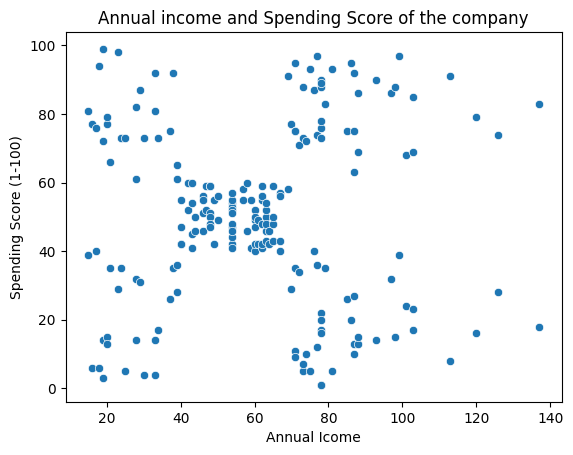

In [7]:
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'],data=df)
plt.xlabel('Annual Icome')
plt.title('Annual income and Spending Score of the company')

In [8]:
male=df[df['Gender']==1].count()
male

CustomerID                88
Gender                    88
Age                       88
Annual Income (k$)        88
Spending Score (1-100)    88
dtype: int64

In [9]:
female=df[df['Gender']==0].count()
female

CustomerID                112
Gender                    112
Age                       112
Annual Income (k$)        112
Spending Score (1-100)    112
dtype: int64

<Axes: xlabel='Gender', ylabel='Age'>

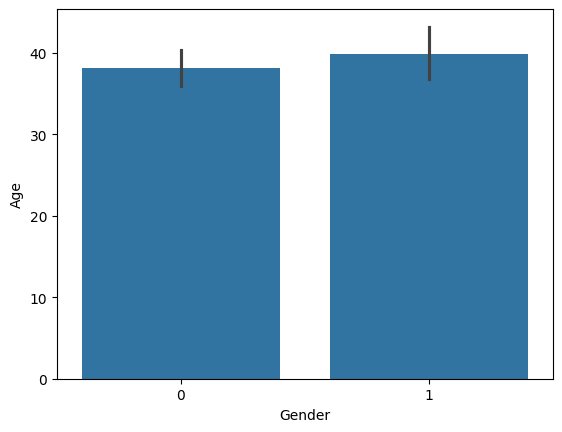

In [10]:
sns.barplot(x=df['Gender'],y=df['Age'],data=df)


<h1>Feature selection</h1>

In [11]:
X=df.iloc[:,1:] # all feature starting from index 1 
X

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [12]:
scaled_data=StandardScaler().fit_transform(X)
scaled_data

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

In [13]:
# unsupervised clustering 
kmeans=KMeans(n_clusters=3,n_init=14) # 12 iteration with three clusters 
label=kmeans.fit_predict(scaled_data)
print(label)

[2 2 0 2 0 2 0 2 1 2 1 2 0 2 1 2 0 2 1 2 1 2 0 2 0 2 0 2 0 2 1 2 1 2 0 2 0
 2 0 2 0 2 1 2 0 2 0 0 0 0 0 2 0 1 0 1 0 1 2 1 1 2 0 0 1 2 0 0 2 0 1 0 0 0
 1 2 0 1 2 0 1 1 1 0 2 1 0 2 2 0 0 2 1 0 0 2 0 2 1 2 2 0 1 2 1 2 0 1 1 1 1
 2 0 2 2 2 0 0 0 0 2 0 0 2 0 2 1 2 1 2 1 2 0 2 1 2 0 2 1 2 0 2 0 2 1 2 1 2
 0 2 1 2 0 2 0 2 1 2 1 2 0 2 1 2 1 2 1 2 0 2 1 2 1 2 0 2 1 2 1 2 0 2 1 2 0
 2 0 2 0 2 0 2 1 2 0 2 0 2 1 2]


In [14]:
print(kmeans.cluster_centers_)

[[-0.88640526  0.44680201 -0.10812358 -0.5442077 ]
 [ 1.12815215  0.74307816  0.06431159 -0.79449512]
 [ 0.03792108 -0.77529133  0.04688104  0.88056434]]


In [15]:
df['label']=label

In [16]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,1,19,15,39,2
1,2,1,21,15,81,2
2,3,0,20,16,6,0
3,4,0,23,16,77,2
4,5,0,31,17,40,0
...,...,...,...,...,...,...
195,196,0,35,120,79,2
196,197,0,45,126,28,0
197,198,1,32,126,74,2
198,199,1,32,137,18,1


In [17]:
df.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,1,19,15,39,2
74,75,1,59,54,47,1
68,69,1,19,48,59,2
163,164,0,31,81,93,2
157,158,0,30,78,78,2
192,193,1,33,113,8,1
165,166,0,36,85,75,2
158,159,1,34,78,1,1
188,189,0,41,103,17,0
40,41,0,65,38,35,0


In [18]:
group1=df[df['label']==0].count()
group2=df[df['label']==1].count()
group3=df[df['label']==2].count()
print(f'I have Gruop 1 {group1}  and Group 2 {group2} and Group 3 {group3}')

I have Gruop 1 CustomerID                66
Gender                    66
Age                       66
Annual Income (k$)        66
Spending Score (1-100)    66
label                     66
dtype: int64  and Group 2 CustomerID                49
Gender                    49
Age                       49
Annual Income (k$)        49
Spending Score (1-100)    49
label                     49
dtype: int64 and Group 3 CustomerID                85
Gender                    85
Age                       85
Annual Income (k$)        85
Spending Score (1-100)    85
label                     85
dtype: int64


In [19]:
df.groupby('label').mean()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
label,,,,,
0,92.560606,0.000000,45.075758,57.727273,36.181818
1,104.489796,1.000000,49.204082,62.244898,29.734694
2,104.364706,0.458824,28.047059,61.788235,72.882353


In [20]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,1,19,15,39,2
1,2,1,21,15,81,2
2,3,0,20,16,6,0
3,4,0,23,16,77,2
4,5,0,31,17,40,0
...,...,...,...,...,...,...
195,196,0,35,120,79,2
196,197,0,45,126,28,0
197,198,1,32,126,74,2
198,199,1,32,137,18,1


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

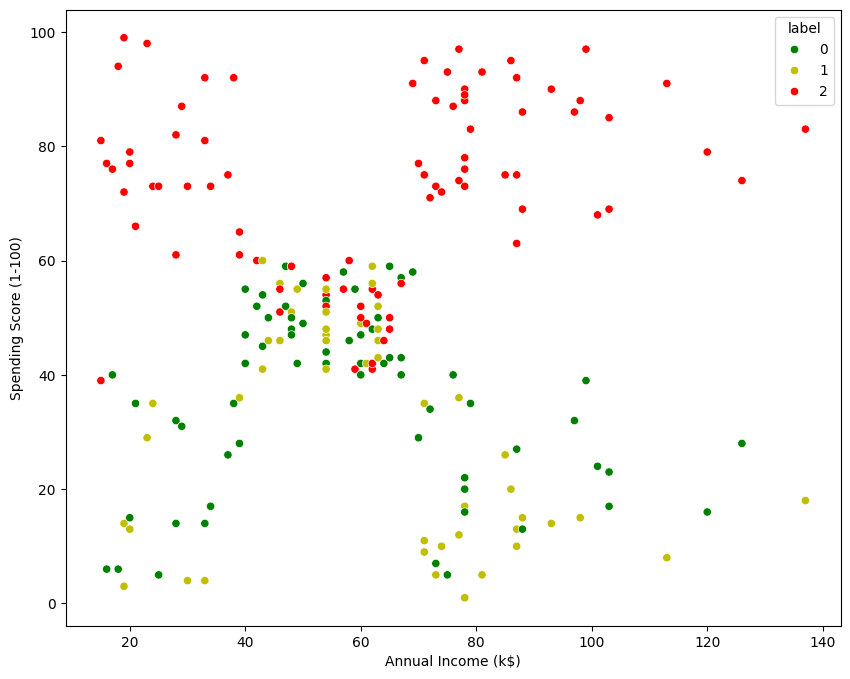

In [22]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],hue=df['label'],palette=['g','y','r'])